# Hyper-parameters Tuning  

In [3]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import pandas as pd
from torch import nn
from skorch import NeuralNetClassifier

(150, 4) (150,)


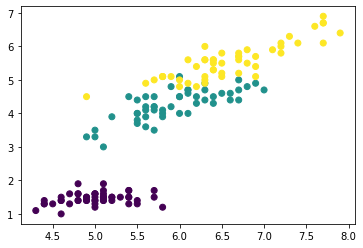

In [4]:
# Load data

X, y = datasets.load_iris(return_X_y=True)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,2], c=y)
plt.show()

# Scikit-Learn

In [29]:
# half data for training, half for test
clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf.fit(X[:75], y[:75])
print(clf.score(X[75:], y[75:]))

0.3333333333333333


## Stratified KFold Cross Validation

In [39]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10]},\
    {'kernel': ['linear'], 'C': [1, 10]}]

clf_cv = GridSearchCV(clf, tuned_parameters, cv=5) # 5 fold
clf_cv.fit(X,y)
pd.DataFrame.from_dict(clf_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002393,0.000488,0.000997,0.000631,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,4
1,0.002990,0.001542,0.000998,0.000632,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,4
2,0.001795,0.000399,0.000798,0.000399,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.900000,0.966667,0.866667,0.933333,1.000000,0.933333,0.047140,3
3,0.002195,0.000755,0.000996,0.000629,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,4
4,0.001402,0.000496,0.000198,0.000396,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,1
5,0.000818,0.000754,0.000779,0.000393,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.000000,0.973333,0.038873,2


In [40]:
clf_cv.best_estimator_

SVC(C=1, kernel='linear', random_state=42)

##  Cross Validation Iterator

In [44]:
cv = StratifiedKFold(n_splits=5)
clf_cv = GridSearchCV(clf, tuned_parameters, cv=cv)
clf_cv.fit(X,y)
pd.DataFrame.from_dict(clf_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002592,0.000490,0.000701,0.000397,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,4
1,0.002201,0.000754,0.001000,0.000005,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,4
2,0.001206,0.000393,0.000399,0.000489,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.900000,0.966667,0.866667,0.933333,1.000000,0.933333,0.047140,3
3,0.001789,0.000746,0.000803,0.000402,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,4
4,0.000841,0.000423,0.000557,0.000459,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,1
5,0.001183,0.000371,0.000812,0.000407,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.000000,0.973333,0.038873,2


In [49]:
# login
e = clf_cv.best_estimator_
skf = StratifiedKFold(n_splits=5)
for i1, i2 in skf.split(X, y):
    e.fit(X[i1], y[i1])
    print(e.score(X[i2], y[i2]))

0.9666666666666667
1.0
0.9666666666666667
0.9666666666666667
1.0


## Custom Cross Validation Iterator

In [70]:
def custom_cv_2folds():
    i = 1
    while i < 2:
        i1 = np.arange(120, dtype=int)
        i2 = np.arange(120, 150, dtype=int)
        yield i1, i2
        i += 1
custom_cv = custom_cv_2folds() # half for training, half for testing

In [53]:
clf_cv = GridSearchCV(clf, tuned_parameters, cv=custom_cv)
clf_cv.fit(X,y)
pd.DataFrame.from_dict(clf_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002496,5.010366e-04,0.001495,5.036592e-04,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.000000,0.000000,0.000000,0.0,4
1,0.001496,4.974604e-04,0.000997,4.768372e-07,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.000000,0.000000,0.000000,0.0,4
2,0.000997,1.192093e-07,0.000500,4.997253e-04,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.333333,0.333333,0.333333,0.0,1
3,0.001009,1.513958e-05,0.000998,2.384186e-07,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.000000,0.000000,0.000000,0.0,4
4,0.001482,5.130768e-04,0.001000,2.264977e-06,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",0.333333,0.333333,0.333333,0.0,1
5,0.001494,5.007982e-04,0.001497,5.002022e-04,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",0.333333,0.333333,0.333333,0.0,1


# PyTorch

In [3]:
X = X.astype(np.float32)
y = y.astype(np.int64)

In [4]:
class MyModule(nn.Module):
    def __init__(self, hid_dim=4, nonlin=nn.ReLU()):
        super(MyModule, self).__init__()

        self.clf = nn.Sequential(nn.Linear(4, hid_dim), nn.Dropout(0.5),\
            nn.Linear(hid_dim, hid_dim),\
                nn.Linear(hid_dim, 3),\
                    nn.Softmax(dim=-1))

    def forward(self, X, **kwargs):
        prob = self.clf(X)
        return prob


net = NeuralNetClassifier(MyModule, max_epochs=10,lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,)

net.fit(X, y)
y_proba = net.predict_proba(X)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.6643       0.2000        1.1815  0.4122
      2        1.2043       0.3000        1.1385  0.0050
      3        1.1866       0.3333        1.1479  0.0040
      4        1.1418       0.3333        1.1298  0.0050
      5        1.1792       0.4000        1.0861  0.0040
      6        1.0934       0.4667        1.0632  0.0040
      7        1.1202       0.5333        1.0509  0.0040
      8        1.0582       0.3667        1.0284  0.0040
      9        1.0864       0.4000        1.0193  0.0040
     10        1.0631       0.6000        1.0088  0.0040


In [73]:
params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    'module__hid_dim': [4, 8],
}
gs = GridSearchCV(net, params, cv=2, scoring='accuracy', verbose=2)

gs.fit(X, y)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

m  0.0040
      9        1.0682       0.3333        1.0664  0.0030
     10        1.1280       0.3333        1.0632  0.0030
[CV] END ..........lr=0.01, max_epochs=10, module__hid_dim=4; total time=   0.0s
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.5134       0.2667        1.1118  0.0030
      2        1.3272       0.2000        1.1096  0.0040
      3        1.3135       0.2000        1.1075  0.0040
      4        1.2042       0.2000        1.1069  0.0040
      5        1.3258       0.2667        1.1046  0.0030
      6        1.2129       0.3333        1.1046  0.0040
      7        1.3093       0.3333        1.1045  0.0040
      8        1.3089       0.3333        1.1041  0.0030
      9        1.2795       0.3333        1.1034  0.0030
     10        1.2250       0.3333        1.1030  0.0040
[CV] END ..........lr=0.01, max_epochs=10, module__hid_dim=8; total time=   0.0s
  epoch    train_loss    valid

In [75]:
pd.DataFrame.from_dict(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr,param_max_epochs,param_module__hid_dim,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062839,0.002999,0.002488,0.000493,0.01,10,4,"{'lr': 0.01, 'max_epochs': 10, 'module__hid_di...",0.333333,0.360000,0.346667,0.013333,6
1,0.060339,0.002493,0.002495,0.000501,0.01,10,8,"{'lr': 0.01, 'max_epochs': 10, 'module__hid_di...",0.333333,0.586667,0.460000,0.126667,3
2,0.116689,0.002993,0.002493,0.000498,0.01,20,4,"{'lr': 0.01, 'max_epochs': 20, 'module__hid_di...",0.333333,0.346667,0.340000,0.006667,7
3,0.124289,0.008998,0.002905,0.000909,0.01,20,8,"{'lr': 0.01, 'max_epochs': 20, 'module__hid_di...",0.386667,0.373333,0.380000,0.006667,5
4,0.062789,0.002878,0.001995,0.000000,0.02,10,4,"{'lr': 0.02, 'max_epochs': 10, 'module__hid_di...",0.333333,0.680000,0.506667,0.173333,2
5,0.062079,0.002146,0.002493,0.000499,0.02,10,8,"{'lr': 0.02, 'max_epochs': 10, 'module__hid_di...",0.320000,0.600000,0.460000,0.140000,3
6,0.122859,0.002270,0.002491,0.000496,0.02,20,4,"{'lr': 0.02, 'max_epochs': 20, 'module__hid_di...",0.800000,0.800000,0.800000,0.000000,1
7,0.144051,0.020728,0.001995,0.000997,0.02,20,8,"{'lr': 0.02, 'max_epochs': 20, 'module__hid_di...",0.346667,0.333333,0.340000,0.006667,7


In [81]:
# net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    'module__hid_dim': [4, 8],
}
gs = GridSearchCV(net, params, cv=custom_cv, scoring='accuracy', verbose=2)

gs.fit(X, y)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.9180       0.6667        0.7961  0.0030
      2        1.1021       0.6667        0.7906  0.0060
      3        0.8543       0.6667        0.7869  0.0030
      4        0.9471       0.6667        0.7827  0.0040
      5        0.8881       0.6667        0.7793  0.0050
      6        0.8534       0.6667        0.7758  0.0030
      7        0.9244       0.6667        0.7727  0.0050
      8        0.9405       0.6667        0.7694  0.0040
      9        0.8100       0.6667        0.7663  0.0040
     10        0.9964       0.6667        0.7632  0.0040
[CV] END ..........lr=0.01, max_epochs=10, module__hid_dim=4; total time=   0.0s
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.2512       0.3333        1.0033  0.0030
    

In [82]:
pd.DataFrame.from_dict(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr,param_max_epochs,param_module__hid_dim,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064328,5.486250e-03,0.002493,4.981756e-04,0.01,10,4,"{'lr': 0.01, 'max_epochs': 10, 'module__hid_di...",0.000000,0.333333,0.166667,0.166667,2
1,0.057345,1.494765e-03,0.001995,2.384186e-07,0.01,10,8,"{'lr': 0.01, 'max_epochs': 10, 'module__hid_di...",0.000000,0.000000,0.000000,0.000000,4
2,0.146110,3.241348e-02,0.002991,2.384186e-07,0.01,20,4,"{'lr': 0.01, 'max_epochs': 20, 'module__hid_di...",0.000000,0.000000,0.000000,0.000000,4
3,0.124667,5.960464e-07,0.001995,2.384186e-07,0.01,20,8,"{'lr': 0.01, 'max_epochs': 20, 'module__hid_di...",0.000000,0.000000,0.000000,0.000000,4
4,0.061335,4.990101e-04,0.002494,4.985332e-04,0.02,10,4,"{'lr': 0.02, 'max_epochs': 10, 'module__hid_di...",0.000000,0.333333,0.166667,0.166667,2
5,0.075302,3.487706e-03,0.002989,3.218651e-06,0.02,10,8,"{'lr': 0.02, 'max_epochs': 10, 'module__hid_di...",0.000000,0.000000,0.000000,0.000000,4
6,0.129653,1.695466e-02,0.002994,9.982586e-04,0.02,20,4,"{'lr': 0.02, 'max_epochs': 20, 'module__hid_di...",0.000000,0.000000,0.000000,0.000000,4
7,0.134141,1.745343e-02,0.001995,3.576279e-07,0.02,20,8,"{'lr': 0.02, 'max_epochs': 20, 'module__hid_di...",0.053333,0.320000,0.186667,0.133333,1


In [54]:
from skorch.dataset import Dataset
from skorch.helper import predefined_split
from skorch.callbacks import Checkpoint
from skorch.callbacks import EarlyStopping
x0, y0 = X[:120], y[:120]
x1, y1 = X[120:], y[120:]

valid_ds = Dataset(x1, y1)
net = NeuralNetClassifier(MyModule, max_epochs=10, lr=0.1,train_split=predefined_split(valid_ds),callbacks=[EarlyStopping(), Checkpoint(monitor='valid_loss_best')])

net.fit(x0, y0)

  epoch    train_loss    valid_acc    valid_loss    cp     dur
-------  ------------  -----------  ------------  ----  ------
      1        1.4969       0.3333        1.0098     +  0.0040
      2        1.2051       0.0000        1.1453        0.0040
      3        1.1248       0.0000        1.2617        0.0040
      4        1.1311       0.0000        1.3284        0.0040
      5        1.0927       0.0000        1.3754        0.0050
Stopping since valid_loss has not improved in the last 5 epochs.


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MyModule(
    (clf): Sequential(
      (0): Linear(in_features=4, out_features=4, bias=True)
      (1): Dropout(p=0.5, inplace=False)
      (2): Linear(in_features=4, out_features=4, bias=True)
      (3): Linear(in_features=4, out_features=3, bias=True)
      (4): Softmax(dim=-1)
    )
  ),
)